# Exercise #10

## Task 10.1

Create a human mobility network for MA using the provided csv file.          
* network node: individual census block group (neighborhood) in MA
* network edge: residents from one neighborhood visiting another
* weight of network tie: percentage of residents from one neighborhood visiting another         

How many nodes and edges are there in your network? 

In [36]:
###Preparation
import os
import networkx as nx
import pandas as pd
os.chdir('/Users/zhenjieyu/Desktop/SOCDATA/Exercise_10/MA_cbg_human_mobility_2019/')

###Getting the data set
Motability_data = pd.read_csv('MA_cbg2cbg_2019_01.csv')
Motability_data.shape #Checking the dataset

###Creating Network Diagram: Preparation
G = nx.Graph()
for i in range(len(Motability_data)):
    origin_cbg = Motability_data.loc[i, 'poi_cbg']
    destination_cbg = Motability_data.loc[i, 'visitor_census_tract']
    total_residents_in_origin = Motability_data.loc[i, 'raw_device_counts']
    num_visitor = Motability_data.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
#     print(origin_cbg, destination_cbg, percent_visitor)
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
# print(nx.info(G)) # Checking number of nodes

###Creating the diagram: Visualization
# nx.draw(G, with_labels=True)

###Checking how many nodes are there
print(nx.info(G))
## There are 40292 nodes and 742299 edges


Graph with 40292 nodes and 742299 edges


/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_20889/3804725346.py:27: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


## Task 10.2

#### Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [28]:
###Creating data set for nodes
Motability_data_node = pd.DataFrame(Motability_data, columns = ['group_id', 'weighted_node_degree', 'unweighted_node_degree'])
group_id = Motability_data['poi_cbg']
Motability_data_node['group_id'] = group_id
weighted = G.degree(Motability_data_node['group_id'], weight = 'weight')
Motability_data_node['weighted_node_degree'] = weighted
unweighted = G.degree(Motability_data_node['group_id'])
Motability_data_node['unweighted_node_degree'] = unweighted
###Displaying the result
display(Motability_data_node)

,group_id,weighted_node_degree,unweighted_node_degree
0,250250303003,"(250250303003, 1.617298098583892)","(250250303003, 2936)"
1,250250303003,"(250250303003, 1.617298098583892)","(250250303003, 2936)"
2,250250303003,"(250250303003, 1.617298098583892)","(250250303003, 2936)"
3,250250303003,"(250250303003, 1.617298098583892)","(250250303003, 2936)"
4,250250303003,"(250250303003, 1.617298098583892)","(250250303003, 2936)"
...,...,...,...
840588,250214571001,"(250214571001, 1.032360005583198)","(250214571001, 867)"
840589,250214571001,"(250214571001, 1.032360005583198)","(250214571001, 867)"
840590,250214571001,"(250214571001, 1.032360005583198)","(250214571001, 867)"
840591,250214571001,"(250214571001, 1.032360005583198)","(250214571001, 867)"


In [43]:
###Weighted/Unweighted Degree
weighted_list = []
unweighted_list = []
for element in Motability_data['poi_cbg']:
    unweighted_list.append(G.degree(element))
    weighted_list.append(G.degree(element, weight='weight'))

###Creating Data file
node_csv = pd.DataFrame(columns=['ID','Weighted','Unweighted'])
node_csv['ID'] = Motability_data['poi_cbg']
node_csv['Weighted'] = weighted_list
node_csv['Unweighted'] = unweighted_list
node_csv
# unweighted_list

,ID,Weighted,Unweighted
0,250250303003,1.617298,2936
1,250250303003,1.617298,2936
2,250250303003,1.617298,2936
3,250250303003,1.617298,2936
4,250250303003,1.617298,2936
...,...,...,...
840588,250214571001,1.032360,867
840589,250214571001,1.032360,867
840590,250214571001,1.032360,867
840591,250214571001,1.032360,867


### Task 10.3

#### Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law? 

<AxesSubplot:xlabel='Weighted', ylabel='Count'>

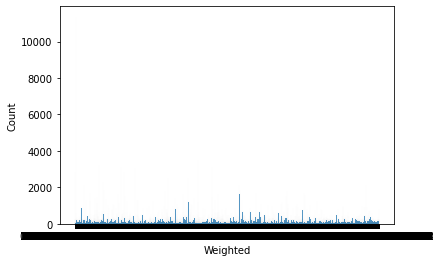

In [44]:
import seaborn as sns
sns.histplot(data = node_csv, x = node_csv['Weighted'].astype(str))

###Analysis
##I think the pattern of the graph don' t follow the power law because it is skewed to the right, which is not asymmetrical (from the histogram).
##The histogram doesn't fulfill the characteristics of the scale-free network where distribution is not descreasing as the node degree increases.
